# GroundModel

> Joseph P. Vantassel, The University of Texas at Austin

This file is intended as a gallery for the class `GroundModel` from `swprepost`.

## Table of Contents

- [GroundModel](#GroundModel)
    - [Creating a GroundModel](#Creating-a-GroundModel)
        - [GroundModel()](#GroundModel())
        - [from_simple_profiles()](#from_simple_profiles())
        - [from_geopsy()](#from_geopsy())    
    - [Working with a GroundModel](#Working-with-a-GroundModel)
        - [plotting](#plotting)
        - [vs30](#vs30)
        - [discretize](#discretize)
    - [Saving a GroundModel](#Saving-a-GroundModel)
        - [write_to_txt()](#write_to_txt())
        - [write_to_mat()](#write_to_mat())

In [1]:
import swprepost
import numpy
import matplotlib.pyplot as plt

## GroundModel

A `GroundModel` is defined by layers of infinite lateral extent where each layer is represented by its `thickness`,
`compression-wave velocity`, `shear-wave velocity`, and `mass density`.

### Creating a GroundModel

This section covers the most common methods for instantiating a `GroundModel` object.

#### GroundModel()

The "manual" way of creating a `GroundModel`.

In [2]:
tk = [2,3,0]          # Define thicknesses in meters of a 3-layered model.
vs = [100, 200, 300]  # Define shear-wave velocity (Vs) of each layer in meters/second.
vp = [200, 500, 600]  # Define compression-wave velocity (Vp) of each layer in meters/second.
rh = [2000]*3         # Define mass density of each layer in kg/m3.
      
# Create GroundModel object, called gm
gm = swprepost.GroundModel(thickness=tk, vp=vp, vs=vs, density=rh)

print(type(gm))       # See class of type GroundModel
print(gm)             # View string representation of GroundModel, should look familiar ;)

<class 'swprepost.groundmodel.GroundModel'>
3
2.0 200.0 100.0 2000.0
3.0 500.0 200.0 2000.0
0.0 600.0 300.0 2000.0



#### from_simple_profiles()

If you have three 1-D profiles, one for Vs, one for Vp, and one for Mass Density, you could do the math yourself, or you could let
the `from_simple_profiles()` method do the math for you! 

In [3]:
vp_tk = [2,0]          # Two layers in terms of Vp.
vp = [300, 1500]       # Define Vp of first and second layer.

vs_tk = [3,5,0]        # Three layers in terms of Vs.
vs = [150, 200, 300]   # Define Vs of three layers.

rh_tk = [0]            # Use constant mass density.
rh = [2000]            # Define value of mass density.

# Create GroundModel object, called gm
gm = swprepost.GroundModel.from_simple_profiles(vp_tk=vp_tk, vp=vp, vs_tk=vs_tk, vs=vs, rh_tk=rh_tk, rh=rh)

print(type(gm))       # See class of type GroundModel
print(gm)             # View string representation of GroundModel

<class 'swprepost.groundmodel.GroundModel'>
4
2.0 300.0 150.0 2000.0
1.0 1500.0 150.0 2000.0
5.0 1500.0 200.0 2000.0
0.0 1500.0 300.0 2000.0



#### from_geopsy()

Instantiate a ground model from a `.txt` file following the `Geopsy` format.

_Note: If your file contains multiple groundmodels (as is typical), this method will only read the first and
ignore the rest. If you want to read all of the groundmodels in the file, refer to the method `from_geopsy`
for the `GroundModelSuite` object._

In [4]:
# Create a GroundModel object from a file called `from_geopsy_gm.txt`.
gm = swprepost.GroundModel.from_geopsy(fname="inputs/from_geopsy_gm.txt")

print(type(gm))       # See class of type GroundModel
print(gm)             # View string representation of GroundModel

<class 'swprepost.groundmodel.GroundModel'>
7
0.68 196.7 120.3 2000.0
9.69 295.8 120.3 2000.0
0.018 1600.2 120.0 2000.0
22.8 1600.2 231.9 2000.0
43.9 1600.2 840.9 2000.0
576.4 4232.5 840.9 2000.0
0.0 4232.5 2095.3 2000.0



### Working with a GroundModel

#### plotting

It is easy to plot `vs`, `vp`, `rh`, and `pr` once you have a `GroundModel` object. 

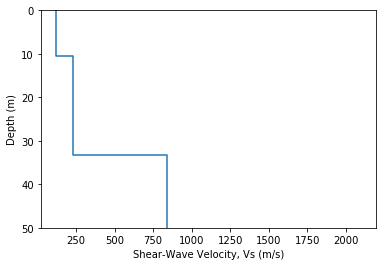

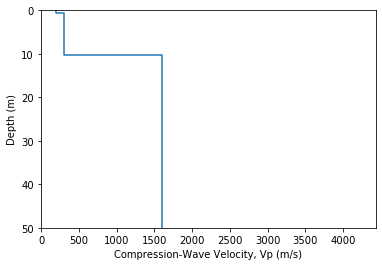

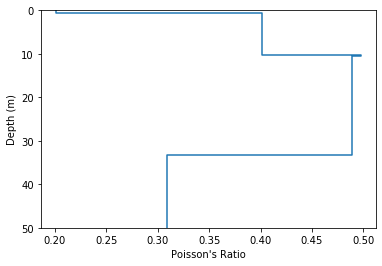

In [5]:
# Create a GroundModel object from a file called `from_geopsy_gm.txt`.
gm = swprepost.GroundModel.from_geopsy(fname="inputs/from_geopsy_gm.txt")

# Plot Vs
plt.plot(gm.vs2, gm.depth)                   # Use vs2 and depth to get the iconic "stair-step" style
plt.ylim(50, 0)
plt.xlabel("Shear-Wave Velocity, Vs (m/s)")
plt.ylabel("Depth (m)")
plt.show()

# Plot Vp
plt.plot(gm.vp2, gm.depth)                   # Use vp2 and depth to get the iconic "stair-step" style
plt.ylim(50, 0)
plt.xlabel("Compression-Wave Velocity, Vp (m/s)")
plt.ylabel("Depth (m)")
plt.show()

# Plot Poisson's Ratio
plt.plot(gm.pr2, gm.depth)                   # Use pr2 and depth to get the iconic "stair-step" style
plt.ylim(50, 0)
plt.xlabel("Poisson's Ratio")
plt.ylabel("Depth (m)")
plt.show()

#### vs30

Its also easy to get the time-average shear-wave velocity in the upper 30m (vs30)

In [6]:
# Create a GroundModel object from a file called `from_geopsy_gm.txt`.
gm = swprepost.GroundModel.from_geopsy(fname="inputs/from_geopsy_gm.txt")

# Print Vs30 rounded to the nearest 0.1 m/s
print(f"Vs30 = {round(gm.vs30,1)} m/s")

Vs30 = 175.5 m/s


#### discretize()

It is also easy to discretize the different parts of the `GroundModel`.

_Note: Is is not recommended to plot discretized profiles unless `dy` is fairly small (say <0.25m) because the discretization
will make it appear as if layer boundaries have shifted from their true location._

In [7]:
# Create a GroundModel object from a file called `from_geopsy_gm.txt`.
gm = swprepost.GroundModel.from_geopsy(fname="inputs/from_geopsy_gm.txt")

dmax = 20                                               # Discretize down to 20m.
dy = 1                                                  # Split profile at 1m increments.
par="vs"                                                # Perform discretization on Vs
depth, param = gm.discretize(dmax, dy, parameter=par)   # Perform discretization

print(f"Discretized Depth = {depth}")      # View discretized depth
print(f"Discretized Vs    = {param}")      # View discretized Vs

Discretized Depth = [0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0, 13.0, 14.0, 15.0, 16.0, 17.0, 18.0, 19.0, 20.0]
Discretized Vs    = [120.3, 120.3, 120.3, 120.3, 120.3, 120.3, 120.3, 120.3, 120.3, 120.3, 120.3, 231.9, 231.9, 231.9, 231.9, 231.9, 231.9, 231.9, 231.9, 231.9, 231.9]


### Saving a GroundModel

#### write_to_txt()

You may wish to write a `GroundModel` to `.txt` format for many reasons, including further calculations using the `Geospy` suite.
The `write_to_txt()` method will allow you to write your `GroundModel` to a text file and comply with the `Geopsy` format.

In [8]:
tk = [2,3,0]          # Define thicknesses in meters of a 3-layered model.
vs = [100, 200, 300]  # Define shear-wave velocity (Vs) of each layer in meters/second.
vp = [200, 500, 600]  # Define compression-wave velocity (Vp) of each layer in meters/second.
rh = [2000]*3         # Define mass density of each layer in kg/m3.
      
# Create GroundModel object, called gm
gm = swprepost.GroundModel(thickness=tk, vp=vp, vs=vs, density=rh)

# Write GroundModel to Geopsy format
gm.write_to_txt("to_gm0.txt")

#### write_to_mat()

If you or your colleages ;) are users of `MATLAB` you can share your `GroundModel` using the `.mat` binary format.

In [9]:
tk = [2,3,0]          # Define thicknesses in meters of a 3-layered model.
vs = [100, 200, 300]  # Define shear-wave velocity (Vs) of each layer in meters/second.
vp = [200, 500, 600]  # Define compression-wave velocity (Vp) of each layer in meters/second.
rh = [2000]*3         # Define mass density of each layer in kg/m3.
      
# Create GroundModel object, called gm
gm = swprepost.GroundModel(thickness=tk, vp=vp, vs=vs, density=rh)

# Write GroundModel to Geopsy format
gm.write_to_mat("to_gm0")